In [1]:
import json
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
import matplotlib.pyplot as plt

# 데이터 불러오기

데이터 출처 : https://www.kaggle.com/rhammell/planesnet?select=planesnet

In [2]:
file = open('data/planesnet.json')
plane_data = json.load(file)
file.close()

plane_data.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

데이터 세트
- 비행기 이미지 8000개
- 자연 이미지 8000개
- 비행기의 일부분 이미지 8000개
- 비행기와 유사한 물체 이미지 8000개

# 데이터 전처리

In [3]:
plane_x = np.array(plane_data['data']).astype('uint8')
plane_y = np.array(plane_data['labels']).astype('uint8')
plane_yy = np.array(plane_data['labels']).astype('uint8')

In [4]:
plane_x.shape

(32000, 1200)

In [5]:
plane_x = plane_x.reshape([-1, 3, 20, 20]).transpose([0,2,3,1])
plane_x.shape

(32000, 20, 20, 3)

In [6]:
plane_y = tf.keras.utils.to_categorical(plane_y)
plane_y.shape

(32000, 2)

In [7]:
plane_x = plane_x / 255.0

In [8]:
plane_x_train, plane_x_test, plane_y_train, plane_y_test = train_test_split(plane_x,plane_y,test_size = 0.2)

# 모델 정의

In [9]:
model = Sequential([
    Conv2D(32, (5,5), activation = 'relu', input_shape=(20, 20, 3)),
    Conv2D(64,(5,5), activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(128,(5,5), activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation = tf.nn.relu),
    Dropout(0.35),
    Dense(128, activation = tf.nn.relu),
    Dropout(0.35),
    Dense(2, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 128)         0

# 모델 컴파일

In [10]:
model.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습

In [11]:
plane_model = model.fit(plane_x_train, plane_y_train, epochs=20, batch_size=256, validation_data=(plane_x_test,plane_y_test))

Epoch 1/20
100/100 [==============================] - 14s 142ms/step - loss: 0.4622 - accuracy: 0.7771 - val_loss: 0.3173 - val_accuracy: 0.8611
Epoch 2/20
100/100 [==============================] - 14s 144ms/step - loss: 0.2926 - accuracy: 0.8692 - val_loss: 0.1970 - val_accuracy: 0.9216
Epoch 3/20
100/100 [==============================] - 15s 147ms/step - loss: 0.1791 - accuracy: 0.9286 - val_loss: 0.1344 - val_accuracy: 0.9505
Epoch 4/20
100/100 [==============================] - 15s 148ms/step - loss: 0.1416 - accuracy: 0.9455 - val_loss: 0.1032 - val_accuracy: 0.9630
Epoch 5/20
100/100 [==============================] - 16s 155ms/step - loss: 0.1160 - accuracy: 0.9555 - val_loss: 0.0894 - val_accuracy: 0.9691
Epoch 6/20
100/100 [==============================] - 15s 152ms/step - loss: 0.1017 - accuracy: 0.9620 - val_loss: 0.0881 - val_accuracy: 0.9684
Epoch 7/20
100/100 [==============================] - 15s 150ms/step - loss: 0.0984 - accuracy: 0.9624 - val_loss: 0.0742 - val_ac

# 모델 테스트

In [12]:
plane_classes = {0: 'No Plane',
                 1: 'Plane'}

classification_plane = model.predict(plane_x_train)

In [13]:
print('실제 {}.'.format(plane_classes[plane_yy[1]]))

print('예측 {}.'.format(plane_classes[np.argmax(classification_plane[1])]))

실제 Plane.
예측 No Plane.


# 모델 평가

In [14]:
model.evaluate(plane_x_train, plane_y_train)

800/800 [==============================] - 5s 7ms/step - loss: 0.0208 - accuracy: 0.9937


[0.0207714531570673, 0.9936718940734863]

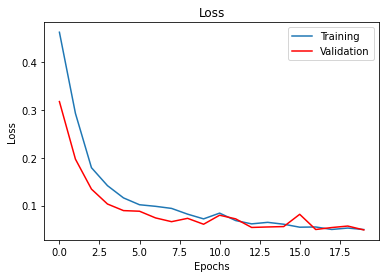

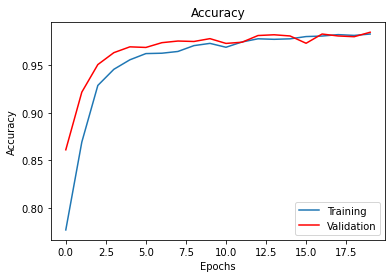

In [15]:
loss_plane = plane_model.history['loss']
val_loss_plane = plane_model.history['val_loss']
acc_plane = plane_model.history['accuracy']
val_acc_plane = plane_model.history['val_accuracy']

plt.plot(loss_plane)
plt.plot(val_loss_plane, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

plt.plot(acc_plane)
plt.plot(val_acc_plane, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)